### Exploratory Data Analysis

We will be using a subset of the LendingClub dataset obtained from [Kaggle](https://www.kaggle.com/wordsforthewise/lending-club).

The goal is to build a model that can predict whether or not a borrower will pay back their loan.

Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are two files in the 'data' folder. First one the actual data (*lending_club_loans.csv*), and the second one is a description of all the columns in the data (*lending_club_info.csv*).  
Let's see the Info file.

In [192]:
data_info = pd.read_csv('data/lending_club_info.csv', index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


Creating a function to make getting the info easier.

In [193]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [194]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Let's see the data file.

In [195]:
df = pd.read_csv('data/lending_club_loans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [196]:
df.shape

(396030, 27)

There are some lines with missing data. That will have to be fixed.  
Column 'loan_status' is the one that we will use as a label for prediction.

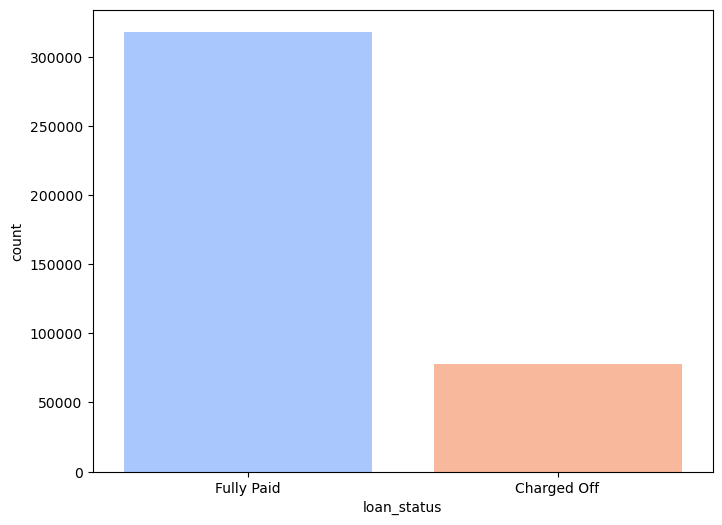

In [197]:
plt.figure(figsize=(8,6))
sns.countplot(
            data=df,
            x='loan_status',
            palette='coolwarm',
            saturation=1,
            )
plt.show()

Let's see how big the loans are.

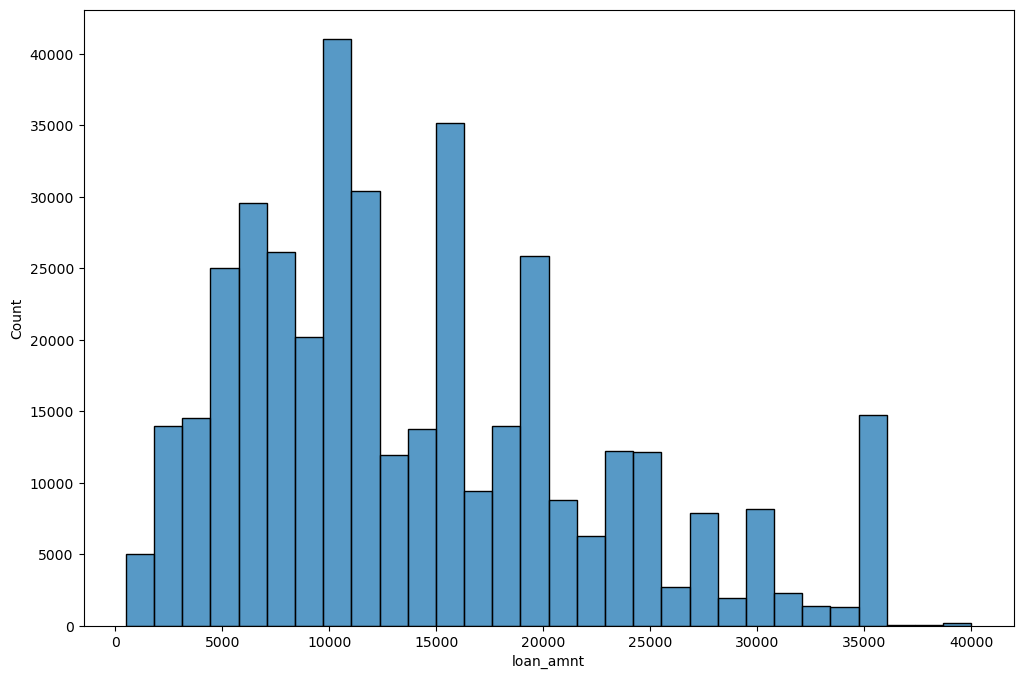

In [198]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['loan_amnt'], bins=30)
plt.show()

Correlation between the features.

In [199]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


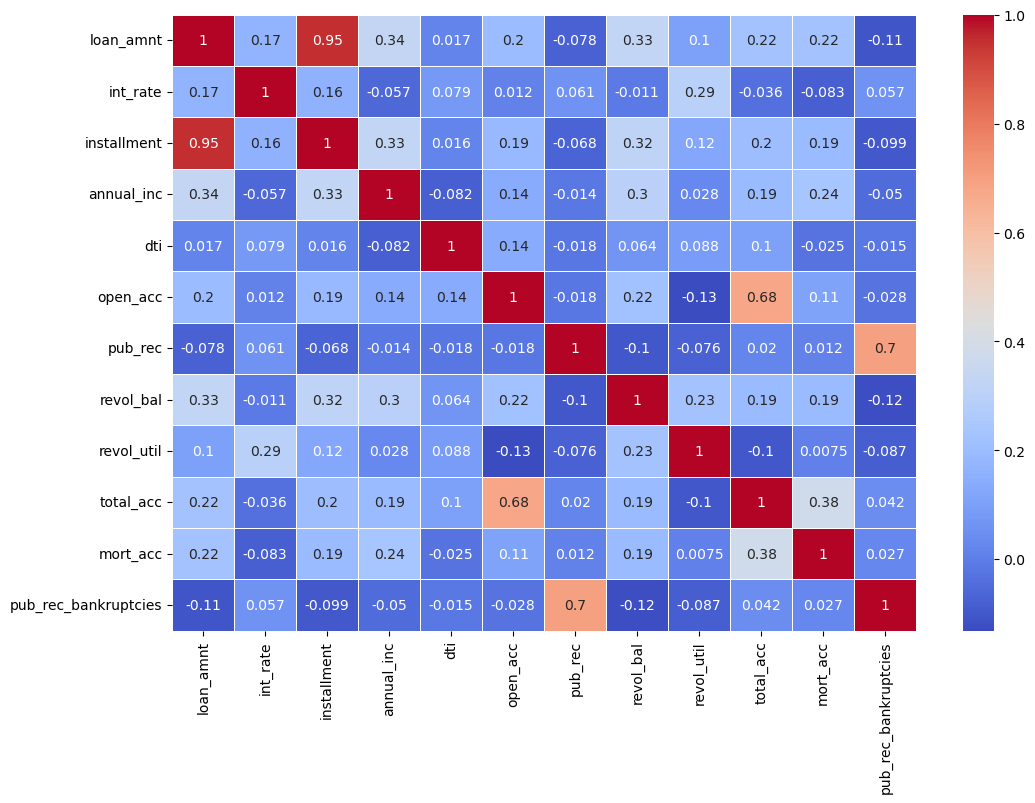

In [200]:
plt.figure(figsize=(12,8))
sns.heatmap(
            df.corr(),
            annot=True,
            linewidths=.6,
            cmap='coolwarm'
            )
plt.show()

There is a very high correleation between loan amount and installment.

In [201]:
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


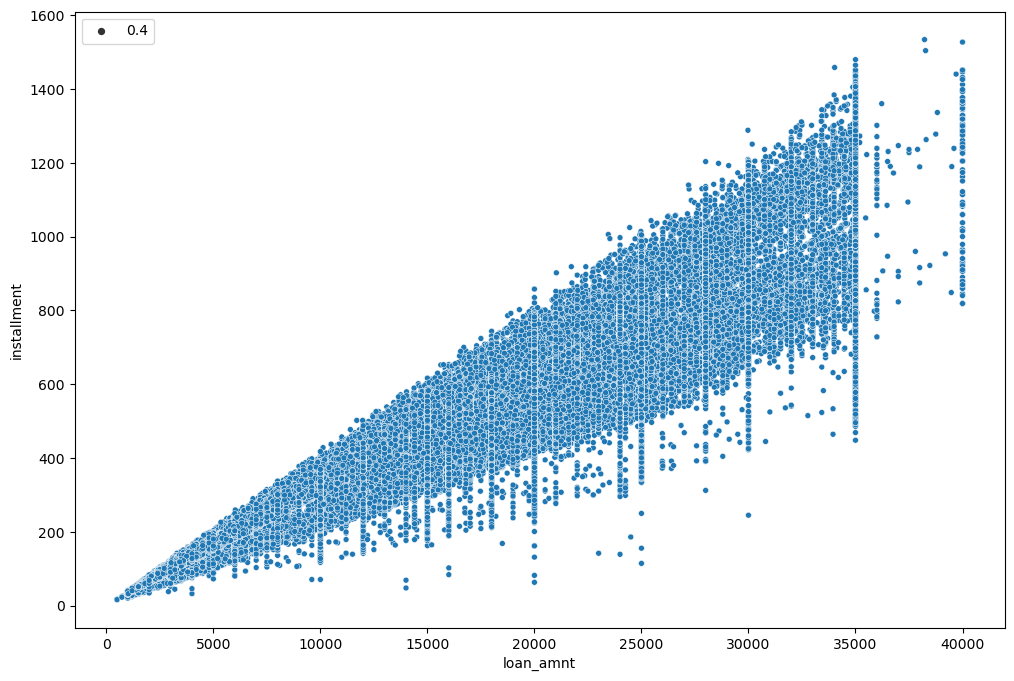

In [202]:
plt.figure(figsize=(12,8))
sns.scatterplot(
                data=df,
                x='loan_amnt',
                y='installment',
                size=.4
                )
plt.show()

It seems logical that when the loan amount is higher, the installment amount is also higher. Looks like the *installment* column is not that important and it sort of duplicates information from the *loan_amnt* column.

Let's see if the loan amount affects the status.

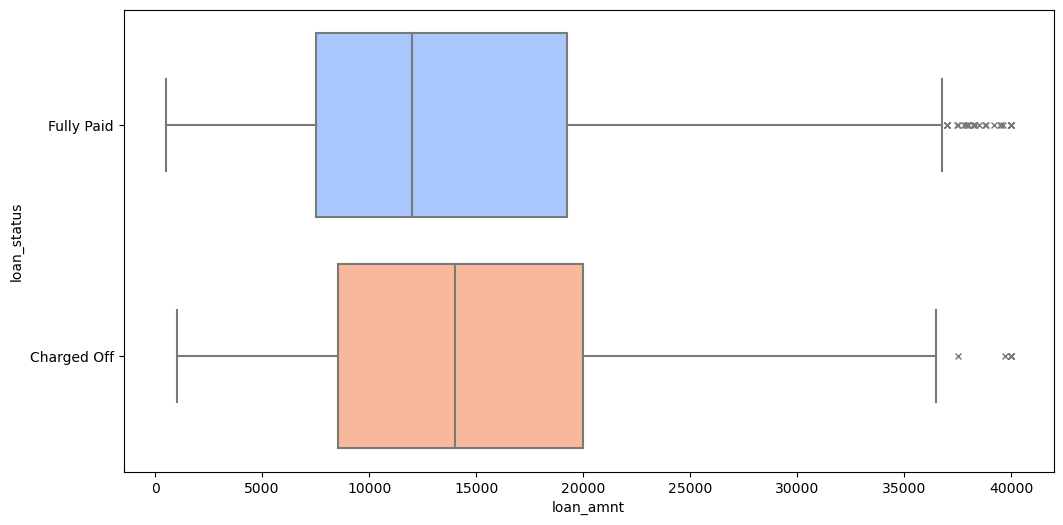

In [203]:
plt.figure(figsize=(12,6))
sns.boxplot(
            data=df,
            x='loan_amnt',
            y='loan_status',
            palette='coolwarm',
            saturation=1,
            flierprops={'marker':'x'}
            )
plt.show()

In [204]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Explore the *grade* and *sub_grade* feature columns.

In [205]:
feat_info('grade')
feat_info('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


In [206]:
grade_order = sorted(df['grade'].unique())
sub_grade_order = sorted(df['sub_grade'].unique())
print('Grades:')
print(grade_order)
print('Subgrades:')
print(sub_grade_order)

Grades:
['A', 'B', 'C', 'D', 'E', 'F', 'G']
Subgrades:
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Seven grades, each one with five subgrades. Let's see how that corresponds with the loan_status.

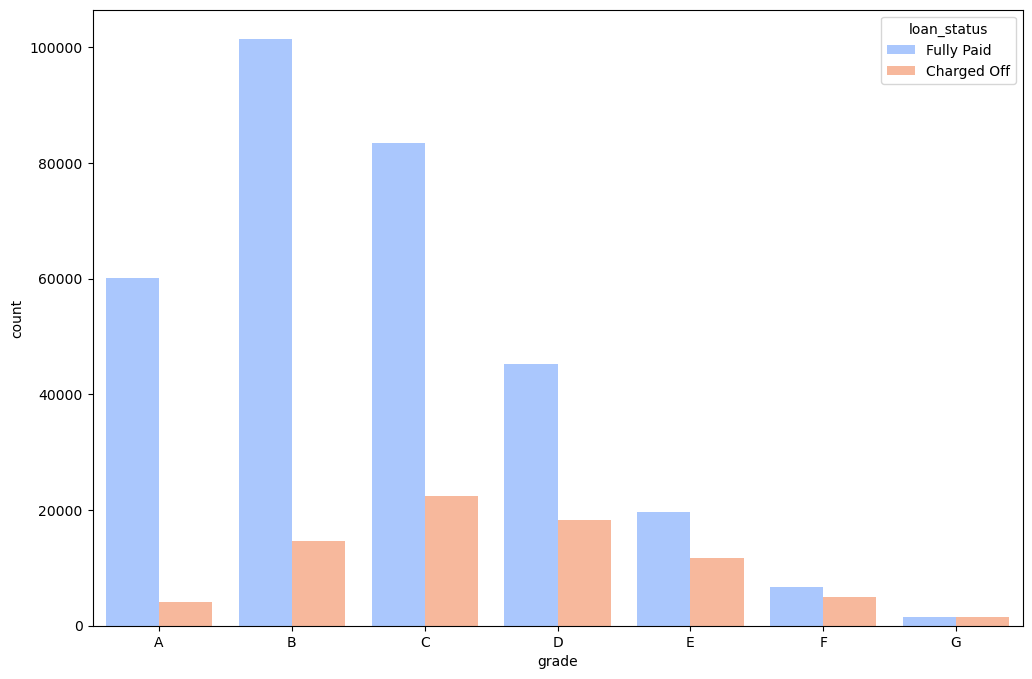

In [207]:
plt.figure(figsize=(12,8))
sns.countplot(
            data=df,
            x=df['grade'],
            order=grade_order,
            palette='coolwarm',
            saturation=1,
            hue='loan_status'
            )
plt.show()

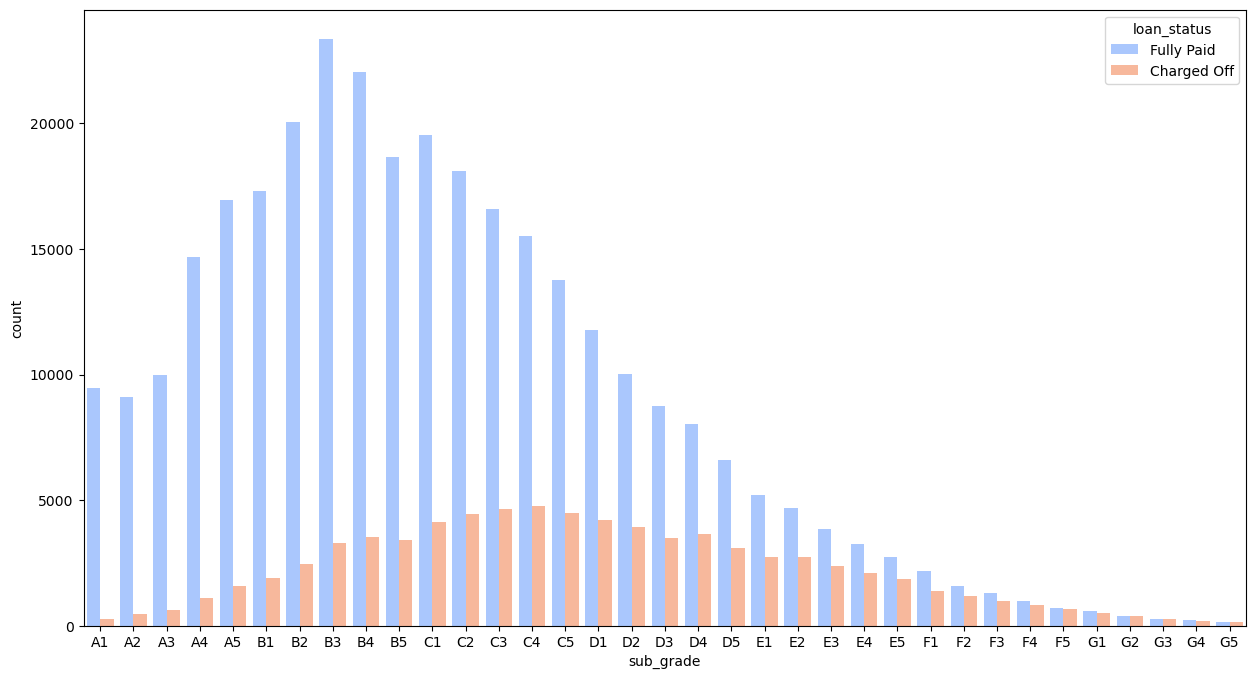

In [208]:
plt.figure(figsize=(15,8))
sns.countplot(
            data=df,
            x='sub_grade',
            order=sub_grade_order,
            palette='coolwarm',
            saturation=1,
            hue='loan_status')
plt.show()

It looks like the higher the subgrade, the lower percentage of the loans is getting paid back.

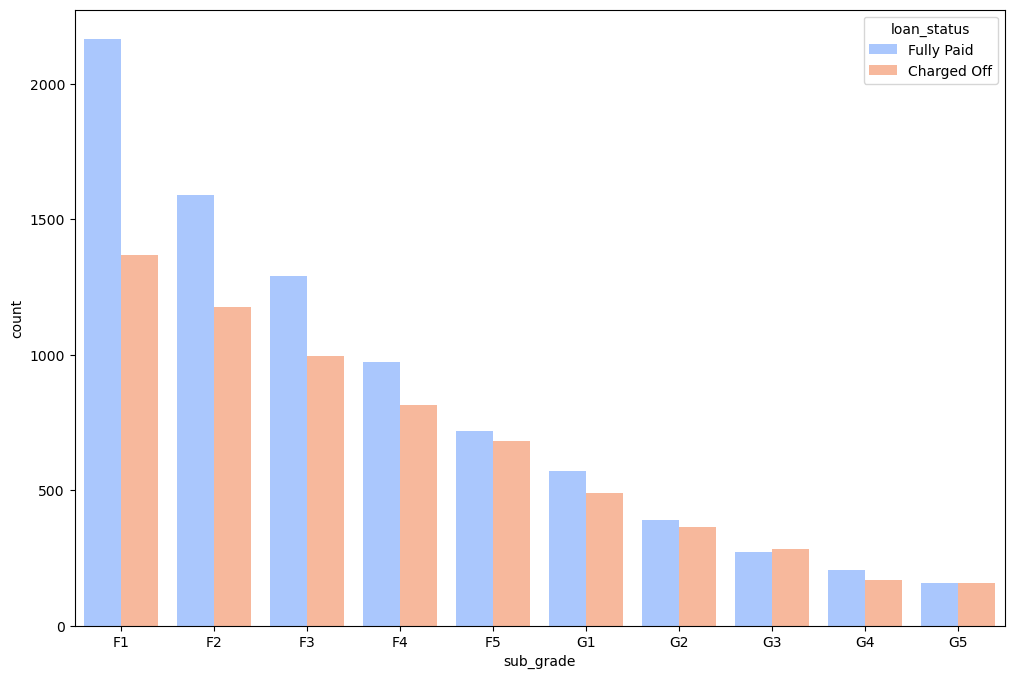

In [209]:
plt.figure(figsize=(12,8))
sns.countplot(
            data=df[df['sub_grade'].isin(sub_grade_order[25:])],
            x='sub_grade',
            order=sub_grade_order[25:],
            palette='coolwarm',
            saturation=1,
            hue='loan_status')
plt.show()

As a last thing in the Exploratory Data Analysys, let's see how features correlate with the *loan_status* column.  
For that, it needs to be changed from categorical to numerical:  
- Fully Paid - 1  
- Charged Off - 0

In [210]:
df['loan_paid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

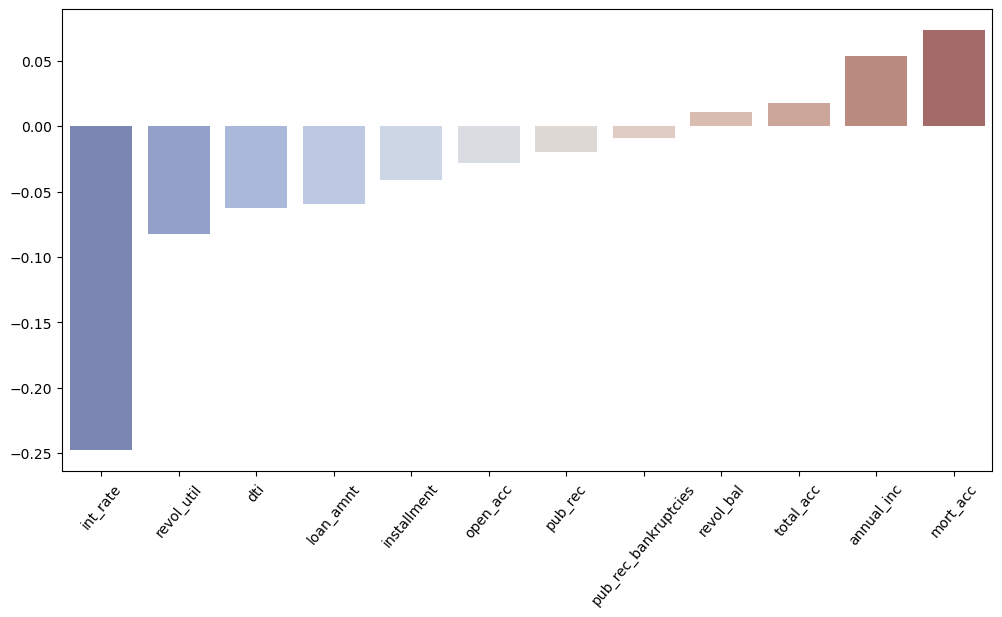

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(
            data=pd.DataFrame(df.corr()['loan_paid'][:-1].sort_values()).transpose(),
            palette='coolwarm',
            saturation=.4
            )
plt.xticks(rotation=50)
plt.show()

### Data Pre-Processing

There are some issues with the data:

1. Missing values. Rows like that needs to be either filled or removed.
2. Categorical fields. These could be replaced with dummy variables or removed. 
3. Repetative or unnecessary fields to be removed.

#### 1. Missing data

Let's see how much data is missing and in what fields.

In [212]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

Start with the *emp_title* and *emp_length*

In [215]:
print('Unique job titles: ' + str(df['emp_title'].nunique()))

Unique job titles: 173105


There is definitely too many unique job titles to replace them with dummy variables. This field can be removed.

In [216]:
df.drop('emp_title',axis=1,inplace=True)

Let's get into employment length.

In [218]:
sorted(df['emp_length'].dropna().unique())
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

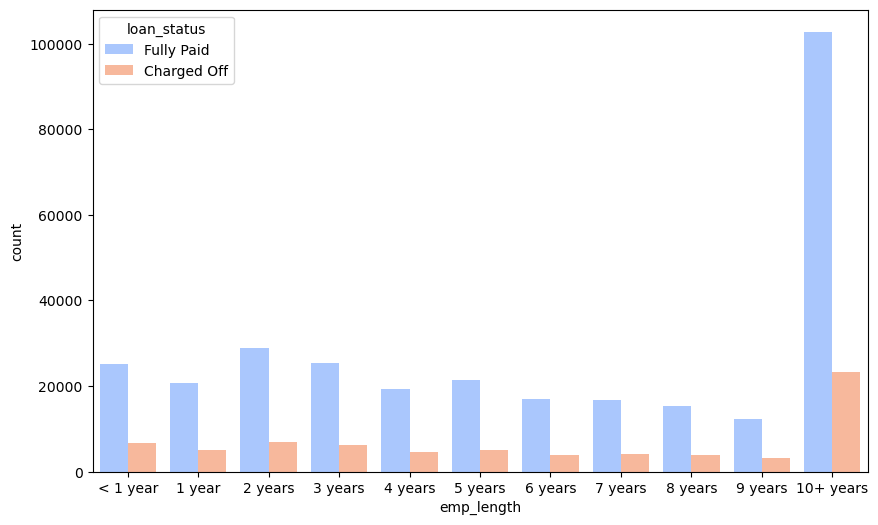

In [219]:
plt.figure(figsize=(10,6))
sns.countplot(
            data=df,
            x='emp_length',
            order=emp_length_order,
            palette='coolwarm',
            saturation=1,
            hue='loan_status')
plt.show()

Fully paid percantage in every category.

In [220]:
pivot = pd.pivot_table(
                        data=df[['emp_length', 'loan_status','sub_grade']],
                        index='emp_length',
                        columns='loan_status',
                        values='sub_grade',
                        aggfunc='count'
                        ).dropna()
pivot.reset_index(inplace=True)
pivot['Paid_percentage'] = pivot.apply(lambda row: row['Fully Paid']/(row['Fully Paid']+row['Charged Off']),axis=1)
pivot

loan_status,emp_length,Charged Off,Fully Paid,Paid_percentage
0,1 year,5154,20728,0.800865
1,10+ years,23215,102826,0.815814
2,2 years,6924,28903,0.806738
3,3 years,6182,25483,0.804769
4,4 years,4608,19344,0.807615
5,5 years,5092,21403,0.807813
6,6 years,3943,16898,0.810806
7,7 years,4055,16764,0.805226
8,8 years,3829,15339,0.800240
9,9 years,3070,12244,0.799530


Percentage of fully paid loans is pretty much the same in every category.  
It means that *emp_length* column can be removed.

In [221]:
df.drop('emp_length',axis=1,inplace=True)

Other missing values.

In [222]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

In [223]:
df[['purpose','title']].head(7)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement


These field are the same. Drop the *title* column.

In [224]:
df.drop('title',axis=1,inplace=True)

Mortgage accounts field. It has lots of missing values.

In [225]:
feat_info('mort_acc')

Number of mortgage accounts.


In [226]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

From the heatmap chart above we can see that *mort_acc* has the highest correlation with the *total_acc*.

In [227]:
df['total_acc'].head(7)

0    25.0
1    27.0
2    26.0
3    13.0
4    43.0
5    23.0
6    25.0
Name: total_acc, dtype: float64

There are many ways to fill the missing data. My approach:
1. Group the data by the *total_acc* field.
2. Calculate mean value of *mort_acc* in every group.
3. Fill the NaN with the mean values.

In [228]:
print('Average mort_acc in every total_acc group')
mort_acc_mean = df.groupby('total_acc').mean()['mort_acc']
mort_acc_mean

Average mort_acc in every total_acc group


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [230]:
def mean_value_fill(total_acc, mort_acc):
    #check if the mort_acc is NaN, if so, fill it with mean value
    if np.isnan(mort_acc):
        return mort_acc_mean[total_acc]
    return mort_acc

In [231]:
df['mort_acc'] = df.apply(lambda row: mean_value_fill(row['total_acc'], row['mort_acc']), axis=1)

In [232]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_paid                 0
dtype: int64

Fields *revol_util* and *pub_rec_bankruptcies* have very few missing values compared to dataframe size. These rows can be removed.

In [233]:
df.dropna(subset=['revol_util','pub_rec_bankruptcies'],inplace=True)

In [234]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

#### 2. Categorical fields

Let's list all categorical fields.

In [235]:
df.select_dtypes(include='object').head(3).transpose()

,0,1,2
term,36 months,36 months,36 months
grade,B,B,B
sub_grade,B4,B5,B3
home_ownership,RENT,MORTGAGE,RENT
verification_status,Not Verified,Not Verified,Source Verified
issue_d,Jan-2015,Jan-2015,Jan-2015
loan_status,Fully Paid,Fully Paid,Fully Paid
purpose,vacation,debt_consolidation,credit_card
earliest_cr_line,Jun-1990,Jul-2004,Aug-2007
initial_list_status,w,f,f


That's quite a lot. Let's check them one by one.

a) *term*  

Change to numerical value

In [67]:
print(df['term'].unique())

[' 36 months' ' 60 months']


In [236]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

b) *grade* and *sub_grade*

Field *grade* can be removed, because it's better to use *sub_grade*. Change *sub_grade* into dummy variable.

In [ ]:
df.drop('grade',axis=1,inplace=True)

In [239]:
sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df,sub_grade],axis=1)
df.drop('sub_grade',axis=1,inplace=True)

c) *home_ownership*

In [250]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Let's convert it to dummy variables and add NONE and ANY to OTHER.

In [251]:
df['home_ownership'].replace({'NONE':'OTHER', 'ANY':'OTHER'},inplace=True)

In [252]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [253]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df,home_ownership],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

d) *verification_status*

In [242]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

Change to dummy variables.

In [243]:
verification_status = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df,verification_status],axis=1)
df.drop('verification_status',axis=1,inplace=True)

e) *application_type*

In [244]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

Change to dummy variables.

In [245]:
application_type = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df,application_type],axis=1)
df.drop('application_type',axis=1,inplace=True)

f) *initial_list_status*

In [246]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

Change to dummy variables.

In [247]:
initial_list_status = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = pd.concat([df,initial_list_status],axis=1)
df.drop('initial_list_status',axis=1,inplace=True)

g) *purpose*

In [248]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

Change to dummy variables.

In [249]:
purpose = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df,purpose],axis=1)
df.drop('purpose',axis=1,inplace=True)

h) *address*

In this case. only zip code can have some informative value. Let's extract that and see how many zip codes there is.

In [254]:
df['zip_code'] = df['address'].apply(lambda row: row[-5:])

In [255]:
df.drop('address',axis=1,inplace=True)

In [256]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

Change to dummy variables.

In [257]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df,zip_code],axis=1)
df.drop('zip_code',axis=1,inplace=True)

i) *issue_d*

This value is not known beforehand so field can be dropped.

In [258]:
df.drop('issue_d',axis=1,inplace=True)

j) *loan_status*

This field has already been turned into numerical earlier. Field can be dropped.

In [259]:
df.drop('loan_status',axis=1,inplace=True)

k) *earliest_cr_line*

In [260]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [261]:
df['earliest_cr_line'].head(10)

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
5    Jan-2005
6    Aug-2005
7    Sep-1994
8    Jun-1994
9    Dec-1997
Name: earliest_cr_line, dtype: object

Let's extract the year into numerical field *earliest_cr_year*.

In [262]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda row: int(row[-4:]))

In [263]:
df.drop('earliest_cr_line',axis=1,inplace=True)

That's all. The data is ready.

In [264]:
df.shape

(395219, 79)

In [265]:
df.to_csv('pre-processed_data.csv',index=False)

### Creating a model

Import libraries.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv('pre-processed_data.csv')

First, split the data into train and test sets.

Field *loan_paid* is the label field to be predicted.

In [6]:
X = df.drop('loan_paid',axis=1).values
y = df['loan_paid'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Normalizing the data.

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Building a model.

The shape is 78 (input) -> 38 -> 19 -> 1 (output). Dropout is set to 20%. Activation function is rectified linear unit (relu) for input and hidden layers, and sigmoid for output.

In [109]:
model = Sequential()

#input
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

#hidden
model.add(Dense(38,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

#output
model.add(Dense(1,activation='sigmoid'))

#binary classification model
model.compile(loss='binary_crossentropy', optimizer='adam')

Training the model.

In [110]:
model.fit(
        x=X_train,
        y=y_train,
        epochs=20,
        validation_data=(X_test,y_test),
        batch_size=2048
        )

Epoch 1/20
136/136 [==============================] - 5s 28ms/step - loss: 0.4579 - val_loss: 0.3058
Epoch 2/20
136/136 [==============================] - 2s 14ms/step - loss: 0.2974 - val_loss: 0.2685
Epoch 3/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2742 - val_loss: 0.2650
Epoch 4/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2693 - val_loss: 0.2639
Epoch 5/20
136/136 [==============================] - 2s 12ms/step - loss: 0.2668 - val_loss: 0.2634
Epoch 6/20
136/136 [==============================] - 2s 12ms/step - loss: 0.2649 - val_loss: 0.2641
Epoch 7/20
136/136 [==============================] - 2s 12ms/step - loss: 0.2639 - val_loss: 0.2625
Epoch 8/20
136/136 [==============================] - 4s 26ms/step - loss: 0.2632 - val_loss: 0.2625
Epoch 9/20
136/136 [==============================] - 2s 18ms/step - loss: 0.2622 - val_loss: 0.2618
Epoch 10/20
136/136 [==============================] - 2s 11ms/step - loss: 0.2619 - val_lo

In [111]:
model.save('lending_data_model_1.h5')

### Evaluating model performance

Chart showing change of the loss on the training data and the test data.

In [112]:
model_loss = pd.DataFrame(model.history.history)

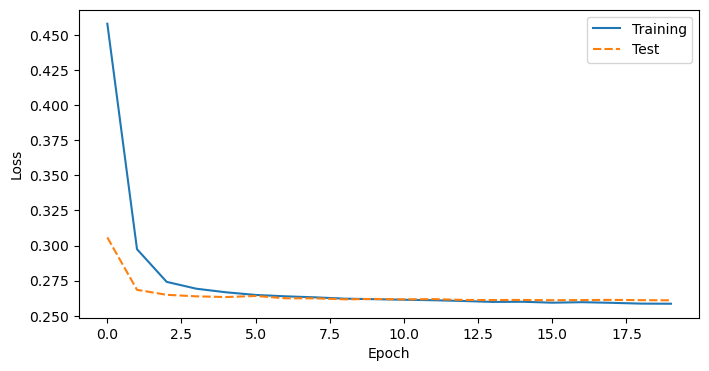

In [113]:
plt.figure(figsize=(8,4))
sns.lineplot(data=model_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', labels=['Training', 'Test'])
plt.show()

Let's now predict the test data.

Method *.predict_classes* has been depreciated so using *.predict method*. It needs to have "> 0.5" added, because it returns values between 0 and 1. This means there there has to bee a cut off point in the middle.

*For example:*  
*Loan will be paid - 0.4*  
*Loan will not be paid - 0.6*  

In [114]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3706/3706 [==============================] - 5s 1ms/step


Print out some statistics.

In [115]:
print('Classification report')
print(classification_report(y_test,predictions))

print('Confusion matrix')
print(confusion_matrix(y_test,predictions))

Classification report
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

Confusion matrix
[[10253 13110]
 [  250 94953]]


### Conclusions

Confusion Matrix tells that the model predicted 105 206 values correctly and 13 360 incorrectly.

There are a few more values in the classification report. They are calculated for both categories, but the ones that describe smaller group (0 - 'Charged Off') are more important.

1. Accuracy is the fraction of predictions that our model got right.  
In this case it's 89%. Accuracy is a good metric when classes are well balanced. In our case they were not. In our data, there is 80% of 'Fully Paid' loans and only 20% of 'Charged Off' loans. So if we created a model that predicts everything as a 'Fully Paid' it would reach 80% accuracy. That's not well balanced dataset. Unfortunately, it's common with datasets like that, where there are two classes of spam/ham, fraud/not fraud, paid/ not paid, etc. It's simply because there are always much more cases of 'good' compared to 'bad'.

2. Precision is a percentage of correct positive predictions relative to total positive predictions. 
In this case it's 98%. That is a pretty good result.  

3. Recall is a percentage of correct positive predictions relative to total actual positives. 
In this case it's 44%. This score is so low, because of the unbalanced data.

4. F1-score is a weighted harmonic mean of precision and recall. The closer to 1, the better the model. 
In this case it's 61%. Not bad not terrible. For this project, the F1-score is the most important metric.